In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
em_df = pd.read_csv("data/raw/co2_emissions.csv")
ct_df = pd.read_csv("data/raw/countries.csv")


# Checking our data to ensure imported okay
# You'll see that the original dataset for carbon emissions (em_df) doesn't
# have the geocoordinates (latitude, longitude) so we'll have to combine
# it with another dataset that has the latitude and longitude
print("Emissions-----")
print("Length:", len(em_df))
print("Columns:", em_df.columns.to_list())
print("Null Values:\n\n", em_df.isna().sum())
print("\n","-"*50,"\n")
print("Countries-----")
print("Length:", len(ct_df))
print("Columns:", ct_df.columns.to_list())
print("Null Values:\n\n", ct_df.isna().sum())


Emissions-----
Length: 213
Columns: ['Country', 'Fossil CO2 emissions(Mt CO2)', 'Unnamed: 2', 'Unnamed: 3', 'Fossil CO2 emissions', 'Unnamed: 5', '2017  Fossil CO2 emissions', 'Unnamed: 7', '2018 CO2 emissions', 'Unnamed: 9']
Null Values:

 Country                          1
Fossil CO2 emissions(Mt CO2)     0
Unnamed: 2                       0
Unnamed: 3                       0
Fossil CO2 emissions             0
Unnamed: 5                       0
2017  Fossil CO2 emissions       2
Unnamed: 7                       2
2018 CO2 emissions              27
Unnamed: 9                      28
dtype: int64

 -------------------------------------------------- 

Countries-----
Length: 244
Columns: ['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric code', 'Latitude (average)', 'Longitude (average)']
Null Values:

 Country                0
Alpha-2 code           1
Alpha-3 code           0
Numeric code           0
Latitude (average)     0
Longitude (average)    0
dtype: int64


In [ ]:
# We're renaming the columns so they make a little more sense
cols_to_rename = {"Fossil CO2 emissions(Mt CO2)":"CO2_1990",
                  "Unnamed: 2":"CO2_2005",
                  "Unnamed: 3":"CO2_2017",
                  "Fossil CO2 emissions":"C02_2017_percent_of_world",
                  "Unnamed: 5":"CO2_2017_v_1990_percent_change",
                  "2017  Fossil CO2 emissions":"CO2_2017_per_land_area",
                  "Unnamed: 7":"CO2_2017_per_capita",
                  "2018 CO2 emissions":"CO2_2018_total_inc_lucf",
                  "Unnamed: 9": "CO2_2018_total_exc_lucf"}
em_df = em_df.rename(cols_to_rename, axis=1)
em_df

,Country,CO2_1990,CO2_2005,CO2_2017,C02_2017_percent_of_world,CO2_2017_v_1990_percent_change,CO2_2017_per_land_area,CO2_2017_per_capita,CO2_2018_total_inc_lucf,CO2_2018_total_exc_lucf
0,NaN,1990.000,2005.000,2017.000,2017(% of world),2017 vs 1990: change (%),Per land area(t CO2/km2/yr),Per capita(t CO2/cap/yr),Total including LUCF,Total excluding LUCF
1,World,22674.116,30049.809,37077.404,100.00%,63.50%,73,4.9,36431.11,35247.21
2,World International Aviation,258.941,422.777,543.381,1.47%,109.80%,NaN,NaN,NaN,NaN
3,World International Shipping,371.804,572.169,677.248,1.83%,82.20%,NaN,NaN,NaN,NaN
4,Afghanistan,2.546,1.063,11.422,0.03%,348.60%,18,0.3,7.59,7.44
...,...,...,...,...,...,...,...,...,...,...
208,Vietnam,20.182,99.231,218.729,0.59%,983.80%,660,2.3,245.36,257.86
209,Western Sahara,0.144,0.227,0.276,0.00%,91.70%,1,0.5,NaN,NaN
210,Yemen,6.887,21.768,12.503,0.03%,81.50%,24,0.4,9.31,9.31
211,Zambia,2.955,2.457,4.967,0.01%,68.10%,7,0.3,40.47,7.74


In [ ]:
# Here we're merging the two dataframes together (we're doing inner join because
# we only want rows with all the information) and then only selecting the columns
# we want.

full_columns = ["Country", "Alpha-2 code", "Latitude (average)", "Longitude (average)", "CO2_1990", "CO2_2005", "CO2_2017", "CO2_2017_per_land_area", "CO2_2017_per_capita"]

full_df = em_df.merge(ct_df, how="inner", on="Country")
full_df = full_df[full_columns]
full_df = full_df.rename({"Country":"country", "Alpha-2 code":"country_abbr"}, axis=1)
full_df

,country,country_abbr,Latitude (average),Longitude (average),CO2_1990,CO2_2005,CO2_2017,CO2_2017_per_land_area,CO2_2017_per_capita
0,Afghanistan,AF,33.00,65.0000,2.546,1.063,11.422,18,0.3
1,Albania,AL,41.00,20.0000,6.583,4.196,5.026,175,1.7
2,Algeria,DZ,28.00,3.0000,65.677,98.197,159.929,67,3.9
3,Angola,AO,-12.50,18.5000,5.851,15.975,30.876,25,1
4,Anguilla,AI,18.25,-63.1667,0.006,0.014,0.028,308,1.9
...,...,...,...,...,...,...,...,...,...
172,Vanuatu,VU,-16.00,167.0000,0.130,0.063,0.091,7,0.3
173,Western Sahara,EH,24.50,-13.0000,0.144,0.227,0.276,1,0.5
174,Yemen,YE,15.00,48.0000,6.887,21.768,12.503,24,0.4
175,Zambia,ZM,-15.00,30.0000,2.955,2.457,4.967,7,0.3


In [ ]:
# Double-checking the resulting dataset to make sure the data is okay
full_df.describe()

,Latitude (average),Longitude (average),CO2_1990,CO2_2005,CO2_2017
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,17.954638,10.294396,98.946407,136.618593,173.961667
std,24.448445,68.698907,443.455340,664.313008,924.849538
min,-41.000000,-175.000000,0.001000,0.002000,0.002000
25%,3.250000,-56.000000,0.525000,1.035000,1.454000
50%,16.250000,15.500000,4.187000,6.306000,9.689000
75%,36.183300,47.000000,43.672000,52.851000,56.771000
max,72.000000,175.000000,5085.897000,6263.064000,10877.218000


In [ ]:
# Double checking to make sure that there's no nan values--
# except there is (in country_abbr)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 177 non-null    object 
 1   country_abbr            176 non-null    object 
 2   Latitude (average)      177 non-null    float64
 3   Longitude (average)     177 non-null    float64
 4   CO2_1990                177 non-null    float64
 5   CO2_2005                177 non-null    float64
 6   CO2_2017                177 non-null    float64
 7   CO2_2017_per_land_area  177 non-null    object 
 8   CO2_2017_per_capita     177 non-null    object 
dtypes: float64(5), object(4)
memory usage: 13.8+ KB


In [ ]:
# It may have accidentally translated "NA" as "NaN"
full_df.loc[full_df["country_abbr"].isnull()==1]

,country,country_abbr,Latitude (average),Longitude (average),CO2_1990,CO2_2005,CO2_2017,CO2_2017_per_land_area,CO2_2017_per_capita
113,Namibia,NaN,-22.0,17.0,1.542,2.504,4.299,5,1.7


In [ ]:
# So we're replacing it with NA
full_df.loc[full_df["country_abbr"].isnull()==1, "country_abbr"] = "NA"
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 177 non-null    object 
 1   country_abbr            177 non-null    object 
 2   Latitude (average)      177 non-null    float64
 3   Longitude (average)     177 non-null    float64
 4   CO2_1990                177 non-null    float64
 5   CO2_2005                177 non-null    float64
 6   CO2_2017                177 non-null    float64
 7   CO2_2017_per_land_area  177 non-null    object 
 8   CO2_2017_per_capita     177 non-null    object 
dtypes: float64(5), object(4)
memory usage: 13.8+ KB


In [ ]:
# Trying to figure out if it's okay to turn this column into float datatype
full_df.CO2_2017_per_land_area.unique()

array(['18', '175', '67', '25', '308', '1412', '76', '162', '5328', '52',
       '861', '376', '215', '46643', '573', '7377', '300', '3414', '19',
       '62', '7944', '38', '500', '14', '58', '447', '12', '10', '21',
       '237', '1867', '1', '119', '1133', '66', '111', '16', '199', '159',
       '309', '285', '760', '1392', '779', '44', '475', '143', '258',
       '373', '88', '6', '396', '13', '79', '138', '9', '153', '166',
       '2230', '78', '104500', '547', '0', '814', '1386', '163', '11',
       '8', '127', '94', '16230', '40', '747', '268', '455', '554',
       '3222', '687', '3494', '275', '98', '32', '37', '5452', '56',
       '125', '2210', '234', '3689', '7', '782', '3213', '5937', '2105',
       '3', '1957', '42', '5', '4176', '318', '136', '45', '2', '103',
       '145', '253', '224', '3074', '457', '1020', '616', '238', '8440',
       '1161', '340', '49', '912', '591', '310', '460', '297', '2142',
       '76841', '772', '750', '383', '365', '113', '544', '50', '182',


In [ ]:
# Since it looks okay, we'll turn them into floats
full_df.CO2_2017_per_capita = full_df.CO2_2017_per_capita.astype("float")
full_df.CO2_2017_per_land_area = full_df.CO2_2017_per_land_area.astype("float")

In [ ]:
# Double-checking to make sure the data-types are good
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 177 non-null    object 
 1   country_abbr            177 non-null    object 
 2   Latitude (average)      177 non-null    float64
 3   Longitude (average)     177 non-null    float64
 4   CO2_1990                177 non-null    float64
 5   CO2_2005                177 non-null    float64
 6   CO2_2017                177 non-null    float64
 7   CO2_2017_per_land_area  177 non-null    float64
 8   CO2_2017_per_capita     177 non-null    float64
dtypes: float64(7), object(2)
memory usage: 13.8+ KB


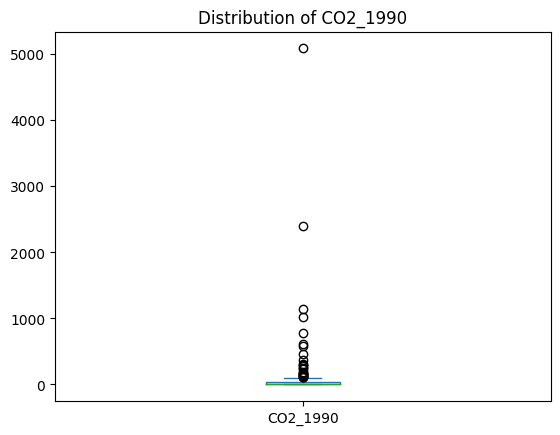

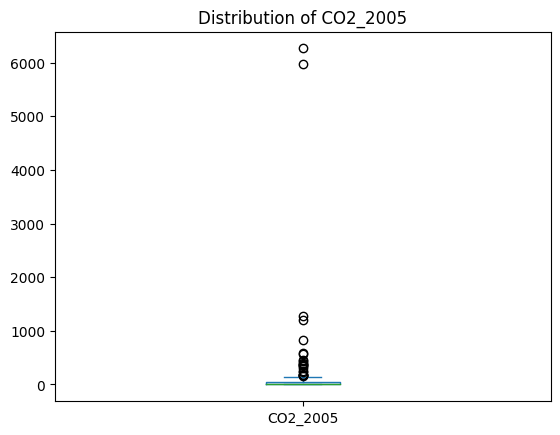

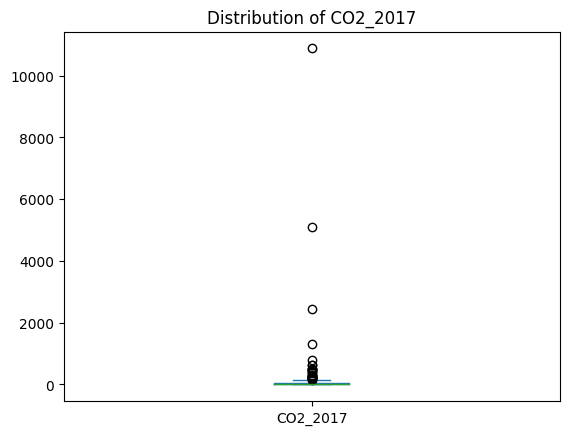

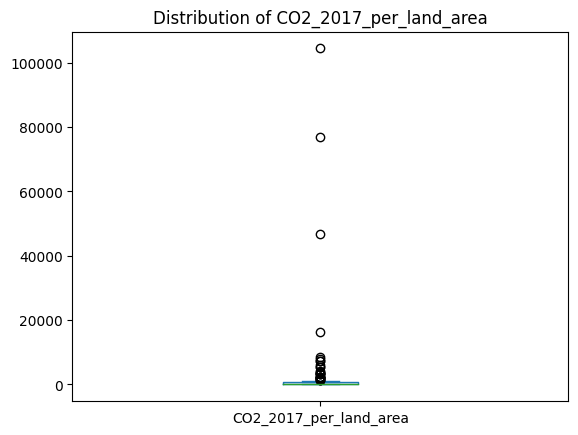

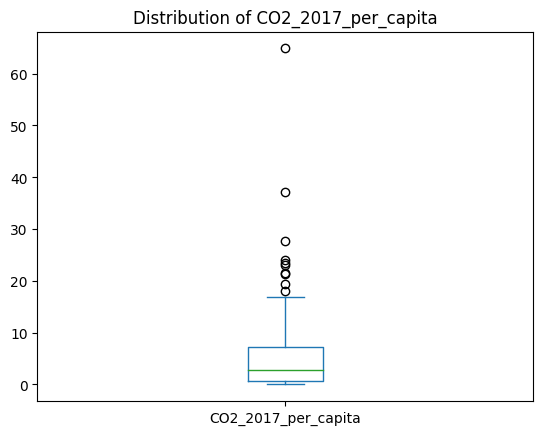

In [ ]:
# Checking the distribution of CO2 just to make sure the data makes sense
for col in full_df.select_dtypes(exclude="object").columns.to_list()[2:]:
  full_df[col].plot.box(title=f"Distribution of {col}")
  plt.show()

In [ ]:
# Exporting to csv
full_df.to_csv("data/clean/combined.csv", index=False)